In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
survivors = pd.read_csv('gender_submission.csv')

In [3]:
data.head()
#test.head()
#survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>Tratamento de dados nulos</h1>

In [4]:
data.drop(columns=['Ticket','Fare', 'Cabin'], axis = 'columns', inplace = True)
mean = data['Age'].mean()
data["Age"].fillna(mean, inplace = True)
data["Embarked"].fillna('S', inplace = True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [5]:
def transformar_sexo(valor):
    try:
        if valor == 'female':
            return 1
        if valor == 'male':
            return 0
    except:
        print("some value has not transformed in number")
    
data['Sex_binario'] = data['Sex'].map(transformar_sexo)
data.drop(columns=['Sex'], axis = 'columns', inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,S,0


<h1>Aplicação da Random Forest</h1>

In [6]:
x = ['Age','Sex_binario']
X = data[x]
y = data['Survived']
#data.loc[data['Sex_binario'] == 'male']

In [7]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [8]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [9]:
p = modelo.predict(X_valid)
np.mean(y_valid == p)

0.7376681614349776

<h1>Plotando a Arvore de Decisão</h1>

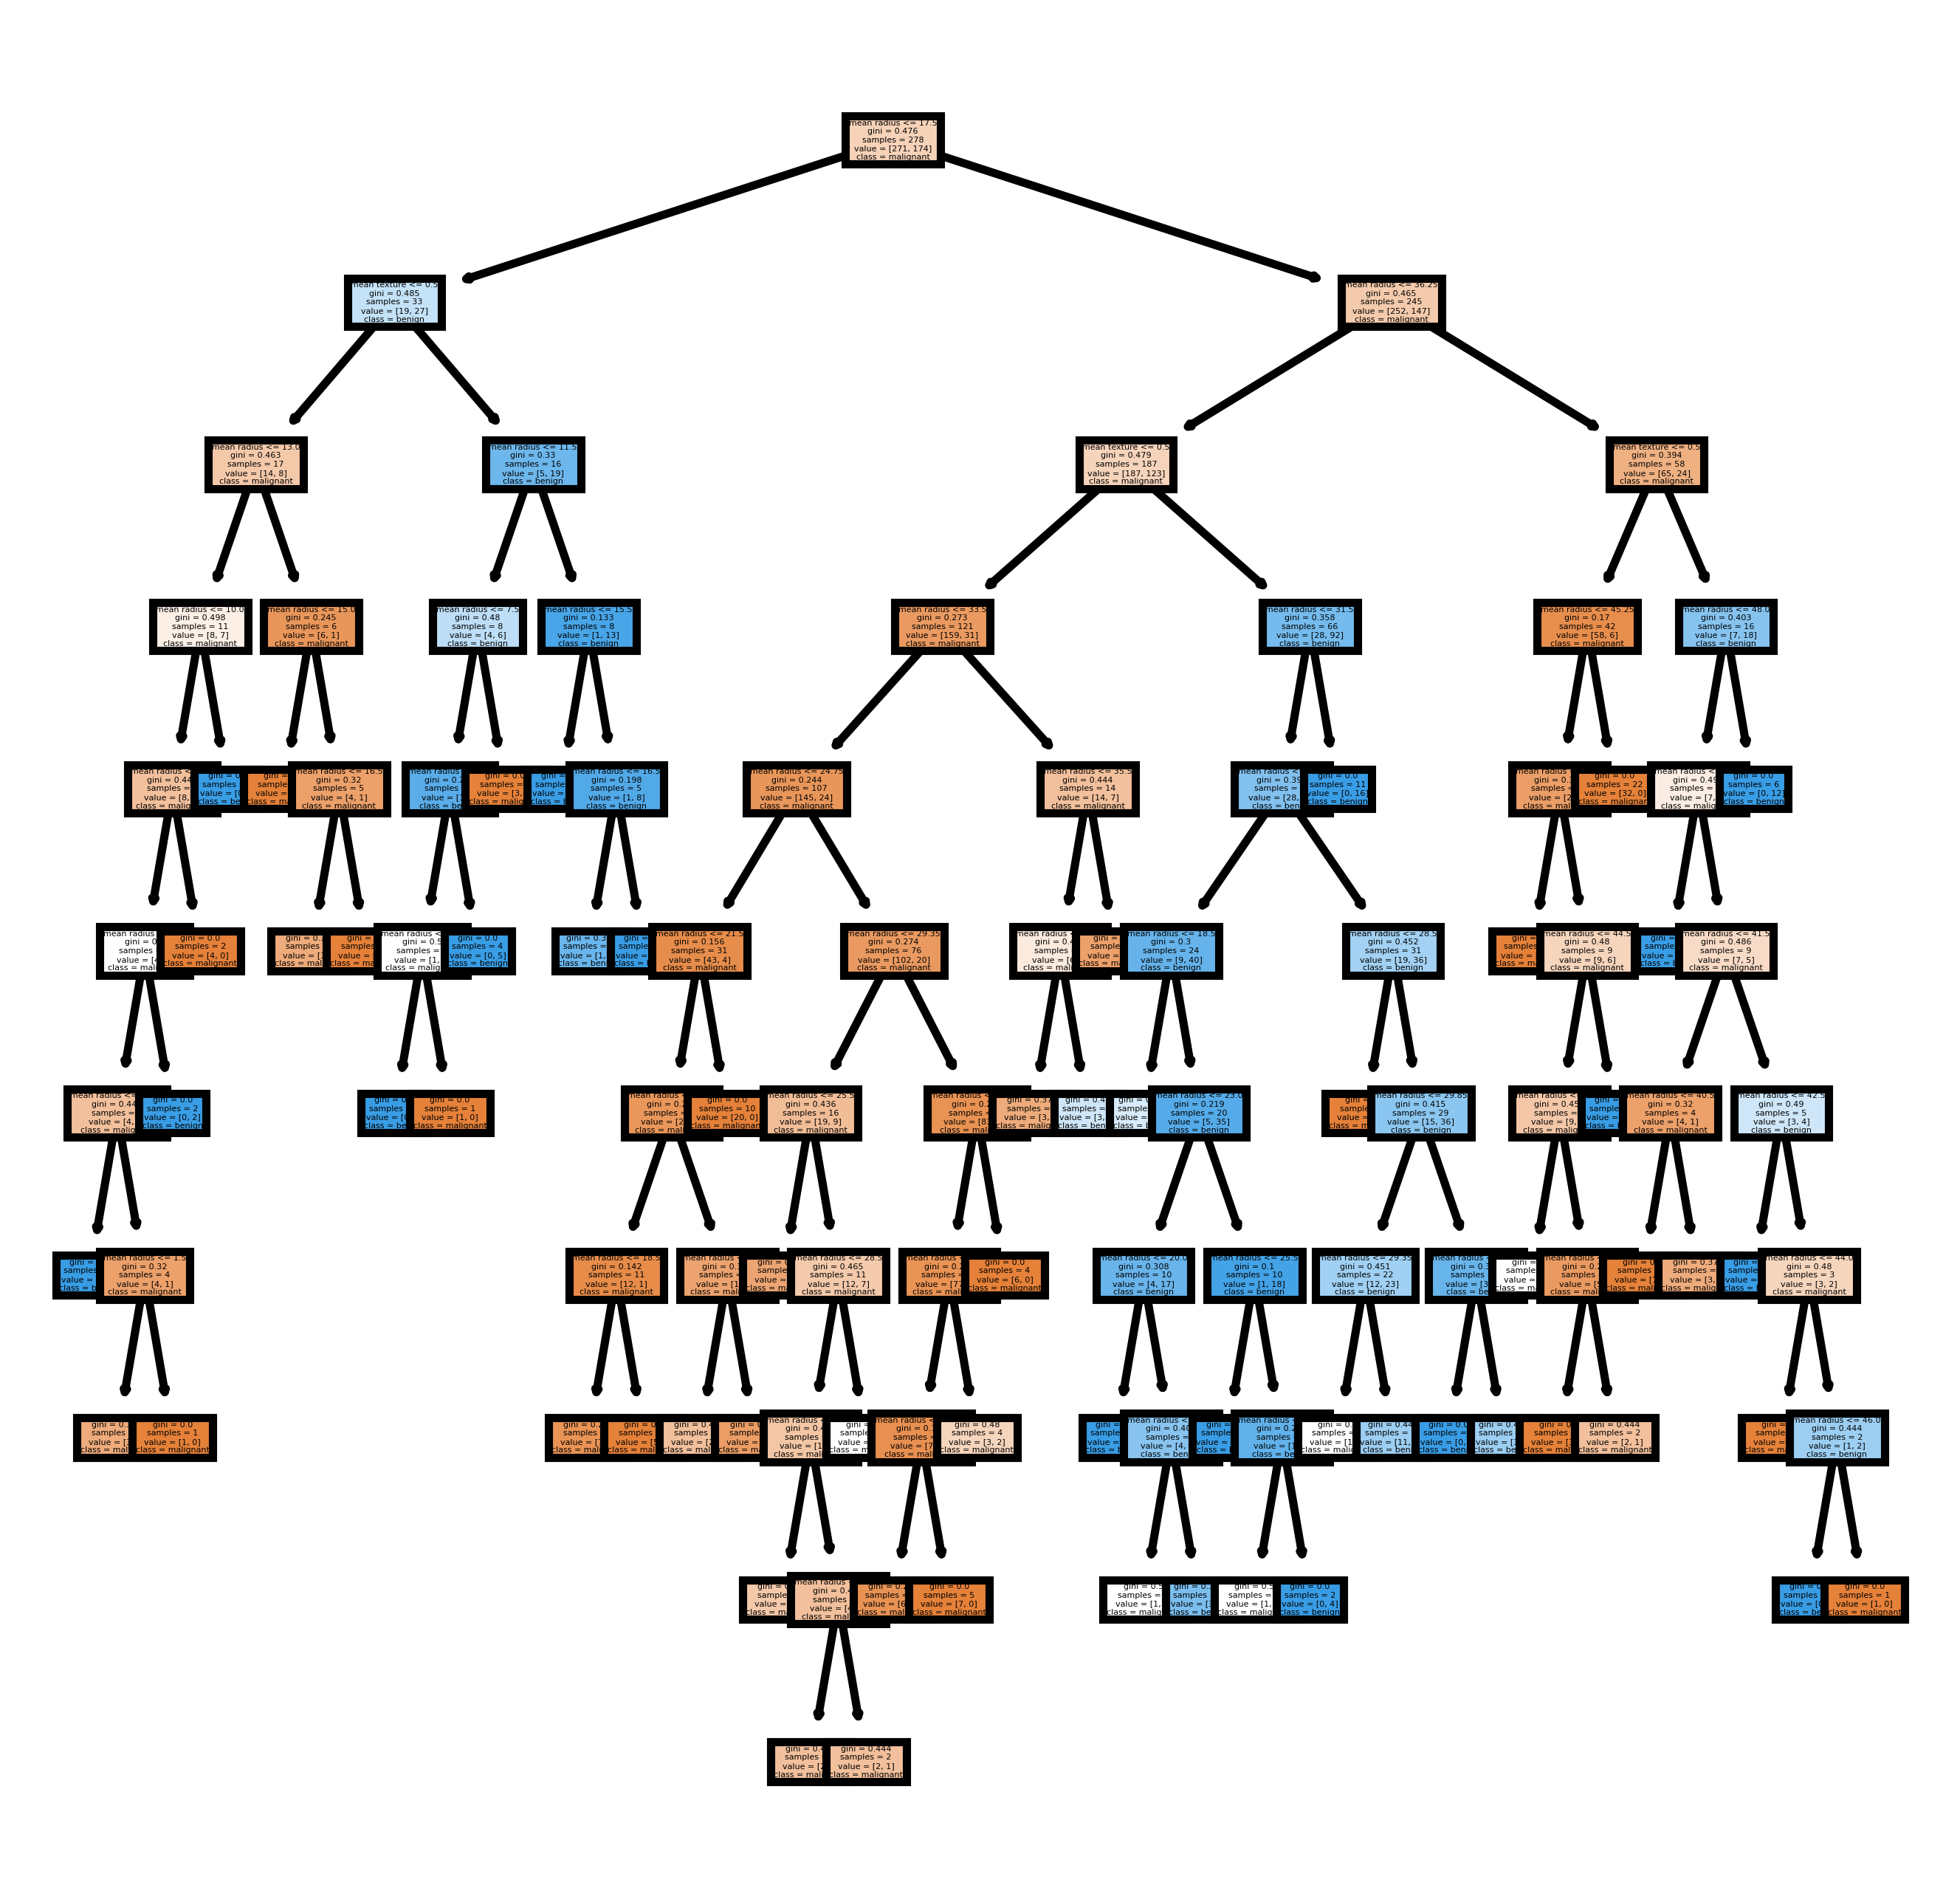

In [10]:
data_bc = load_breast_cancer()
fn=data_bc.feature_names
cn=data_bc.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(modelo.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('individualtree.png')